In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="darkgrid")

## Dataset Explained
| Variable Name | Definition                                                          	 |
|-------------	|---------------------------------------------------------------------	 |
| PassengerId 	| A unique ID to each Passenger; **1-891**                               |
| Survived    	| A boolean variable; **1 - Survived, 0 - Dead**                         |
| Pclass      	| Ticket Class; **1 - 1st, 2 - 2nd, 3 - 3rd class**                      |
| Name        	| Passenger Name                                                      	 |
| Sex         	| Sex of Passenger                                                    	 |
| Age         	| Age in Years                                                        	 |
| SibSp       	|  Number of Siblings / Spouses Aboard                                	 |
| Parch       	| Number of parents / children aboard the titanic                     	 |
| Ticket      	| Ticket number                                                       	 |
| Fare        	| Passenger Fare                                                      	 |
| Cabin       	| Cabin number                                                        	 |
| Embarked    	| Port of Embarkation; **C - Cherbourg, Q - Queenstown, S - Southampton**|
<br/>
### Some Notes Regarding Dataset
**Pclass**: A proxy for socio-economic status (SES)
<br/>1st = Upper
<br/>2nd = Middle
<br/>3rd = Lower
<br/><br/>
**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br/><br/>
**SibSp**: The dataset defines family relations in this way...
<br/>Sibling = brother, sister, stepbrother, stepsister
<br/>Spouse = husband, wife (mistresses and fiancés were ignored)
<br/><br/>
**Parch**: The dataset defines family relations in this way...
<br/>Parent = mother, father
<br/>Child = daughter, son, stepdaughter, stepson
<br/>Some children travelled only with a nanny, therefore parch=0 for them.
<br/><br/>
<p style="text-align:center">*Source: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)*</p>
<br/><br/>
**Let Us have a sneak peek at Data**

In [2]:
# Read data and see first 5 rows
data = pd.read_csv("datasets/titanic-data.csv", index_col=["PassengerId"])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Some Curious Questions
1. Pclass as stated in notes refer to a Socio-economic status. Does it have any effect on survival?<br/><br/>
2. Which gender survived more. In other words, does male part survived in more numbers, or does the female part. There can be many good reasons behind this question. Which are discussed ahead.<br/><br/>
3. Which parameter have more effect over survival, sex or age? 

#### Let's see some Information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Looking at the data info it is clear that we have 891 entries. <br/><br/>
**But there are some missing entries in Age column and quiet a lot of missing details in Cabin column.**<br/>
**All the missing values if required will be changed to zero or will be removed from dataset as we proceed and will be noted before making the change.**

<hr>
### Tackling Question 1.
Q. **Pclass as stated in notes refer to a Socio-economic status. Does it have any effect on survival?**
<br/><br/>Before going ahead let's visualize it.

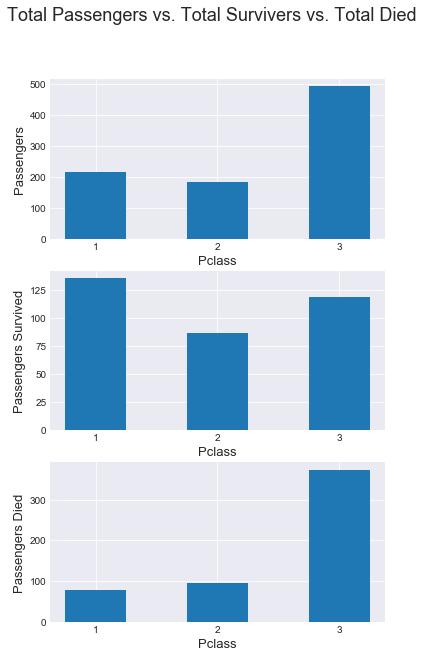

In [4]:
# Create a new plt figure
plt.figure(0, figsize=(6, 10))
plt.suptitle("Total Passengers vs. Total Survivers vs. Total Died", fontsize=18)

# add a new subplot in first row
# pclass vs total passengers
plt.subplot(311)
plt.xlabel("Pclass", fontsize=13)
plt.ylabel("Passengers", fontsize=13)
plt.hist(data['Pclass'], bins=5)
plt.xticks([1.2, 2, 2.8], [1, 2, 3])

# add a new subplot in second row
# pclass vs total passengers survived
plt.subplot(312)
plt.xlabel("Pclass", fontsize=13)
plt.ylabel("Passengers Survived", fontsize=13)
plt.hist(data.loc[data['Survived'] != 0]['Pclass'], bins=5)
plt.xticks([1.2, 2, 2.8], [1, 2, 3])

# add a new subplot in 3rd row
# pclass vs total passengers died
plt.subplot(313)
plt.xlabel("Pclass", fontsize=13)
plt.ylabel("Passengers Died", fontsize=13)
plt.hist(data.loc[data['Survived'] != 1]['Pclass'], bins=5)
plt.xticks([1.2, 2, 2.8], [1, 2, 3])
plt.show()

<br/>
### Comparing The Three using Central Tendency(Mean)
Here we will compare the Total passengers with the number of people died and Survived using mean as a probability of a person bieng survived.
<br/><br/>
$$
mean(\text{Survive | Pclass}) = \frac{\text{No. of People Survived from Pclass}}{\text{Total People in Pclass}}
$$

In [5]:
# make a group object based on pclass
pclass_grouped = data.groupby("Pclass")

# Totale Passengers of each passenger class
total_passengers = pclass_grouped.count()["Survived"]
# No. of Survived Passengers of each passenger class
num_survived = pclass_grouped.sum()["Survived"]
# No. of Passengers of each passenger class who died
num_died = total_passengers - num_survived
# Mean Survival of Each class
mean_survival = pclass_grouped.mean()["Survived"]

In [6]:
# Make a new data frame to show tabular
# representation of the Survivals depending 
# on passenger class
pclass_df = pd.DataFrame({
        "Total": total_passengers,
        "Survived": num_survived,
        "Died": num_died,
        "Mean Survival": mean_survival
    },
    index=[1, 2, 3],
    columns=["Died", "Survived", "Total", "Mean Survival"]
)
pclass_df

,Died,Survived,Total,Mean Survival
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363


**The number of mean survivals of 1st Passenger class (which are significantly less in number), clearly depicts the preference 
of the situation and how upper class had a better chance at survival than others.**<br/><br/>


### Performing z-test to verify the hypothesis

How to prove the hypothesis that 1st class passengers had a better chance at survival?<br/>
Since the samples come from the population on the ship, we perform z-test to check if the upper class had better chance at survival than the population it is taken from. Our Hypothesis<br/>
$$
H_0: \text{ Upper class Didn't have better chance at survival}
$$
<br/>
$$
H_1: \text{ Upper class had better chance at survival}
$$
<br/>
$$
z = \frac{\text{sample mean} - \text{Population Mean}}{\text{Population Std / number of samples}}
$$
**alpha = 0.05<br/>
It is a positive z-test to check if Chances of Survival of Upper class is greater than Chances of Survival for Population.**

In [7]:
def z_test(sample, population):
    sample_mean = sample.mean()
    population_mean = population.mean()
    std_population = population.std()
    n = sample.shape[0]
    den = std_population / np.sqrt(n)
    
    return (sample_mean - population_mean) / den

print("Z-score: ", z_test(data[data["Pclass"] ==1]["Survived"], data["Survived"]))

Z-score:  7.423828259


**Z-score for Positive z-test with alpha level 0.05 equals 1.645.**<br/>
**Z-score of survival of upper class (7.42) is significantly more than that of the population. This clearly indicates that upper class had a far better chance at survival.**

<hr>
### Tackling Question 2
Q. **Which gender survived more. In other words, does male part survived in more numbers, or does the female part. There can be many good reasons behind this question.**<br/><br/>
Reasons for putting up this question:
1. Males' generally have more agiltiy than females'
2. In case of a disaster male of the house tries to protect his family members, yes the other way around is possible but in a more general case the first one seems legit.

Let's Have a sneak peek at visualizations

In [8]:
# Extract and Male and Female Survival Data
male_data = data[data["Sex"]=="male"]["Survived"]
female_data = data[data["Sex"]=="female"]["Survived"]

In [9]:
# dictionary to create a Pandas Series to plot graph
d = {
    "Total Male": male_data.shape[0],
    "Total Female": female_data.shape[0],
    "Survived Male": male_data.sum(),
    "Survived Female": female_data.sum()
}

d_keys_vals = [1, 2, 3, 4]
se = pd.Series(d)
se

Survived Female    233
Survived Male      109
Total Female       314
Total Male         577
dtype: int64

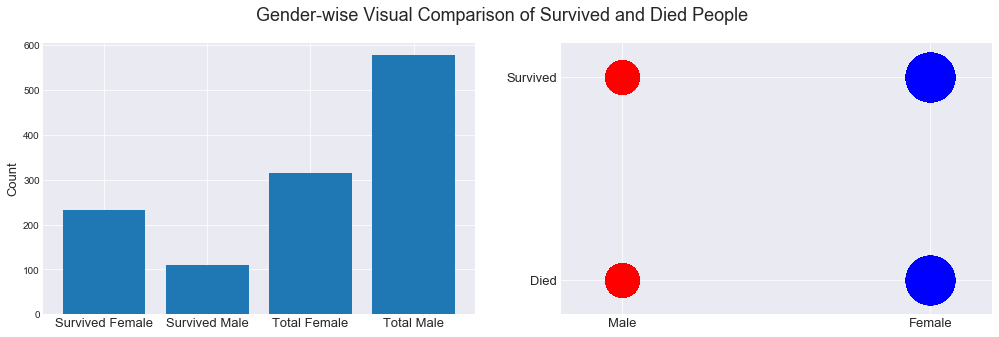

In [10]:
plt.figure(1, figsize=(17, 5))
plt.suptitle("Gender-wise Visual Comparison of Survived and Died People", fontsize=18)

plt.subplot(121)
plt.ylabel("Count", fontsize=13)
plt.bar(d_keys_vals, se[:])
plt.xticks(d_keys_vals, se.index.values, fontsize=13)

plt.subplot(122)
plt.xlim(-0.2, 1.2)
plt.scatter(np.zeros(male_data.shape), male_data, color="red", s=male_data.sum()*10)
plt.scatter(np.ones(female_data.shape), female_data, color="blue", s=female_data.sum()*10)
plt.xticks([0, 1], ["Male", "Female"], fontsize=13)
plt.yticks([0, 1], ["Died", "Survived"], fontsize=13)

plt.show()

That's seems preety unusual, for such a large number of males (approximately twice that of females) the number of survivors are less than a half compared to the number of women.<br/>
Let's see some descriptive statistical terms over these.

In [11]:
# Desciding Male Data Params
male_data.describe()

count    577.000000
mean       0.188908
std        0.391775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64

In [12]:
# Describing Female Data Params
female_data.describe()

count    314.000000
mean       0.742038
std        0.438211
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Surprising Results of Quartiles and means**
<br/>Looking at the results, it is clear that number of males survived is around 18.9% while number of females survived is 74.3% (Remember survived = 1;died = 0, So mean will give the fraction of males and females survived which is converted to percentage above).<br/><br/>
Looking at the 25%, 50% and 75% Quartiles, it is clear that value 1 (survived) lie in a distant corner for males. While it covers almost 50% in case of females.<br/>
<br/>
**The results clearly depict that a female had a more chance at survival than a male. Going by the numbers the chances were almost 4 times.**

<hr>
### Tackling Question 3
Q. **Which parameter have more effect over survival, sex or age?**
<br/>
<br/>
Surely, female to male comparison was drastic, but what about sex vs age. Does the age of a person matters more compared to the sex, may be children had a better chance, or may be aged people survived more. 
<br/>
<br/>
**NOTE: There are some missing values in the Age column, which are removed from dataset to form a new dataset for to answer this question.**<br/>
Why not make them 0? This could hurt the distribution as 177 of the age values are missing and in turn can have effect on our data.

In [13]:
# Extract Age and Sex data with Survival Results
age_vs_sex_data = data[["Survived", "Age", "Sex"]]
# remove NaN values
age_vs_sex_data = age_vs_sex_data.dropna()

print(age_vs_sex_data.shape)
# Convert to Numpy matrix
age_vs_sex_arr = age_vs_sex_data.as_matrix()
# first 5 rows of data
age_vs_sex_data.head()

(714, 3)


,Survived,Age,Sex
PassengerId,,,
1,0,22.0,male
2,1,38.0,female
3,1,26.0,female
4,1,35.0,female
5,0,35.0,male


Let us look at the plots of the dataset to get the feel of what was the fraction of males or females and what was the median age of the passengers present.

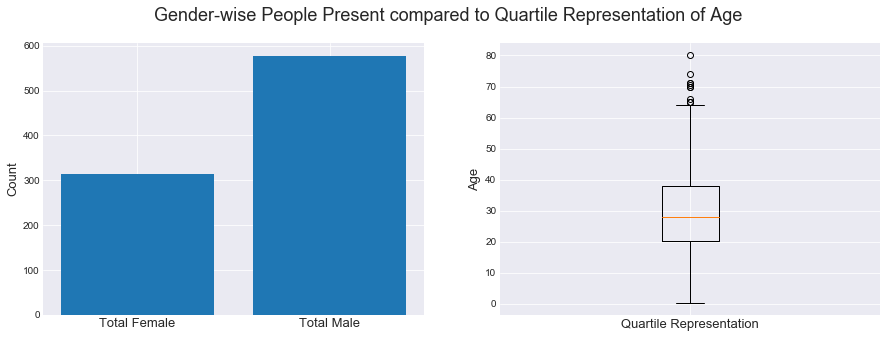

In [14]:
plt.figure(1, figsize=(15, 5))
plt.suptitle("Gender-wise People Present compared to Quartile Representation of Age", fontsize=18)

plt.subplot(121)
plt.ylabel("Count", fontsize=13)
plt.bar(d_keys_vals[2:], se[2:])
plt.xticks(d_keys_vals[2:], se.index.values[2:], fontsize=13)

plt.subplot(122)
plt.figure(1, figsize=(8, 5))
plt.boxplot(age_vs_sex_arr[:, 1])
plt.xticks([1], ["Quartile Representation"], fontsize=13)
plt.ylabel("Age", fontsize=13)

plt.show()

As we looked in question 2, the number of males were almost twice as compared to number of females. Now we can also see that the median age of the people present was around 27 or so with a few people (outlier) with age 70 and above. We can safely thus assume that there were more of young people with age between 19 to 27 and more than 50% of these people were males.

#### Using Scikit-learn's Logistic Regression weights
We can use machine learning library Scikit-Learn (sklearn) to find which field have more effect. <br/>
Logistic Regression Passes a weighted sum of the parameters to a function that gives the probability of something happening. In this case probability of Survival. The coefficient of the parameter gives us the share of the parameter in defining the probability. <br/><br/>
In other words Logistic Regression gives more weightage to the parameter which have more effect on survival.<br/><br/>
$$
P(Survival) = \text{Some Function}({w_1}{Age} + {w_2}{Sex} + w_3)
$$

<br/>
Where,
1. $w_1 = \text{Coefficient of Age Parameter}$
2. $w_2 = \text{Coefficient of Sex Parameter}$
3. $w_3 = \text{Bias}$ 
<br/><br/>
Let's see who affect survival more Age or Sex

In [15]:
# Converting Males to 0 and Females to 1
# as Logistic Regression only work on numbers
age_vs_sex_arr[age_vs_sex_arr == "male"] = 0
age_vs_sex_arr[age_vs_sex_arr == "female"] = 1

# Convert type from object to float
age_vs_sex_arr = age_vs_sex_arr.astype("float64")
# Sanity check of to see if everything is fine
age_vs_sex_arr[0]

array([  0.,  22.,   0.])

In [16]:
# Divide array into Features to train on and Labels to predict
features_train, labels_train = age_vs_sex_arr[:, 1:], age_vs_sex_arr[:, 0]
print("Shapes")
print("-"*30)
print("Feature Train", "  |", "Labels")
print(features_train.shape, "\t|", labels_train.shape)

Shapes
------------------------------
Feature Train   | Labels
(714, 2) 	| (714,)


In [17]:
# import a Logistic Regression and fit our params
from sklearn.linear_model import LogisticRegression as LR
clf = LR()
clf.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# have a look at coefficients, Bias and Accuracy 
# on training set only
print("Coefficient of Age: ", clf.coef_[0, 0])
print("Coefficient of Sex (Female being 1 and Male being 0): ", clf.coef_[0, 1])
print("Bias: ", clf.intercept_)
print("-"*80)
print("Accuracy of the Classifier: ", clf.score(features_train, labels_train))

Coefficient of Age:  -0.00685726104415
Coefficient of Sex (Female being 1 and Male being 0):  2.3689876631
Bias:  [-1.09940297]
--------------------------------------------------------------------------------
Accuracy of the Classifier:  0.780112044818


**Numbers Speak**<br/>
The Coefficient of Sex of the passenger being so high certainly speaks for itself, that how the sex majorly dominated over the survival rate compared to the age of the survivor. And the fact that it is positively correlated also speaks for being female **strongly correlated** to survival.<br/>
Remember Correlation not equals causation.

<hr>

## Conclusion of Findings
The finidings aren't purely statistically proven but the number does give us a clear idea on how the **female survival dominated male survival** and how this dominance was also over the age. By looking at data we can assume that the **affect of more male deaths must had a transferring on the age factor**, as more of the majority gender died. The other factor that really intrigued my attention was the dominance of upper class in a situation like this too.

#### Limitations of Project
The project depicts use of statistical knowledge like using z-test and predictive regression model. **But imporvements can be made like comparison of Female and Male samples as Samples from different population and then using the two sample t-test the hypothesis can be tested. The one pointed out is just an example there are a few more which can be corrected using statistical knowledge**

## Future Plans
This report covers only 3 of the main Parameters - Age, Sex and Passenger Class. There are many more degrees of freedom present in the data. For example, the following questions can still be tackled:
1. Fare of a ticket represents the economic status of a person. (To my common sense; may not be always true). Does a person with a ticket of higher fare have higher chances of survival or not?<br/><br/>
2. Does the deck of the cabin ensures the survival? (There will be some decks which filled with water fast as compared to others depending on the place of impact).<br/><br/>
3. What about the title of the person in the name (Mr., Mrs. Miss, etc.), does it ensures survival?